## Clustering: Iris Dataset

In [1]:
# prepare environment
% matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import sklearn

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import data set
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.datasets.base.Bunch

In [4]:
items = iris.items()                      # Gets all the data from this Bunch - a huge list
df = pd.DataFrame(items[1][1])            # Gets the Attributes
df[len(df.columns)] = items[2][1]         # Adds a column for the Target Variable
df.columns = items[-1][1] + [items[2][0]] # Gets the column names and updates the dataframe
                                                    # From SO

In [5]:
df.head(2)
# set(df.target.tolist())   # --> 3 target clusters

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [6]:
df.columns.tolist(), len(df)

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)',
  'target'],
 150)

### The data
- 150 datapoints
- 3 target classes to predict
- 4 features in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm
- Descriptive statistics and visualisation below

In [7]:
# Get descriptive statistics of features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


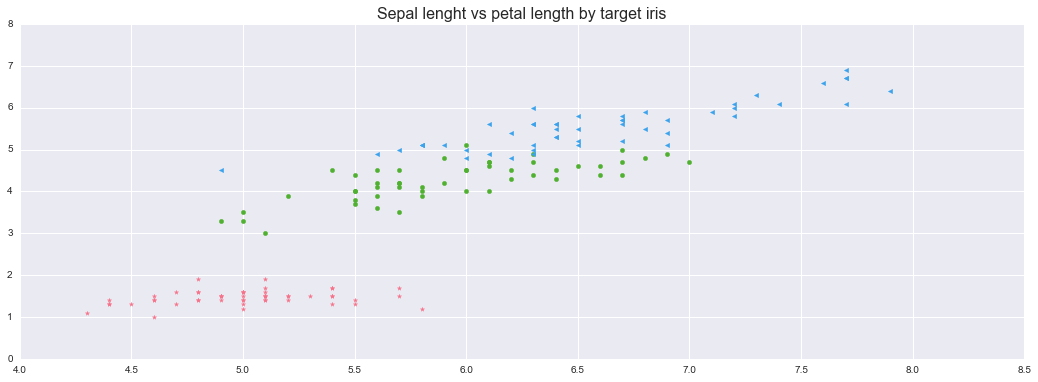

In [8]:
# Visualise the Iris Data
# Sepal lenght vs petal length by target iris
fig = plt.figure(figsize=(18,6), dpi=1600) 

alpha=alpha_scatterplot = 0.5
sns.set_style("darkgrid")
colors = sns.husl_palette(3)

df0 = plt.scatter(df[df.target == 0]['sepal length (cm)'], df[df.target == 0]['petal length (cm)'], marker='*', color=colors[0])
df1 = plt.scatter(df[df.target == 1]['sepal length (cm)'], df[df.target == 1]['petal length (cm)'], marker='o', color=colors[1])
df2 = plt.scatter(df[df.target == 2]['sepal length (cm)'], df[df.target == 2]['petal length (cm)'], marker='<', color=colors[2])

plt.title('Sepal lenght vs petal length by target iris', fontsize=16)

plt.show()

### K Means Clustering

The K-means is an efficient algorithm, but does not guarantee that similar instances end up in the same cluster. 

The algorithm takes the number of clusters as an input parameter and assigns all remainging nodes to one of these recursively by computing the mean distance to the centroid. The process is repeated until either the assignments no longer changes (becomes stable) or it reaches a preset stop criteria.

In [9]:
from sklearn import cluster
from sklearn.neighbors import NearestNeighbors

# Convert the two features Sepal and Petal length to np arrays
data = np.array(df[['sepal length (cm)', 'petal length (cm)']])

# Compute the K Nearest Neighbours
# K-Means for k=3
n_clusters = 3
k_means = cluster.KMeans(n_clusters = n_clusters, init = 'random')
k_means.fit(data)

df['kmean_index'] = k_means.labels_

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(df['target'], df['kmean_index'])

array([[50,  0,  0],
       [ 1,  4, 45],
       [ 0, 37, 13]])

As seen in the resulting confusion matrix, even with ground truth (clusters = 3), the algorithm assigns most of the observations to the incorrect cluster.

K means is sensitive to the method of initiatialisation, in this case I used the built in function for random initialisation. Since the algorithm is efficient and fast to run it is common to run it multiple times with different starting conditions.

Not knowing ground truth or the true number of cluster we could also run the algorithm with a range of different number of clusters (f.eg. 2-5) and calculate the silhouette coefficient for each of the results. The silhouette score gives the average value for all the samples and provides a perspective into the density and separation of the formed clusters.

However, from looking at the visual representation of this dataset it likely that the results would yield an correct number of clusters.